# --------------------------- QueryWise---------------------------

## Project Goal

**Build a RAG System**

The objective of this project is to develop a robust generative search system in the insurance domain that can effectively and accurately answer questions by retrieving and synthesizing information from various insurance policy documents. Leveraging frameworks like LangChain or LlamaIndex, the system will combine semantic search, embedding generation, and large language model (LLM) response generation to provide precise and verifiable answers.


# Retrieval-Augmented Generation (RAG) for Insurance Document Analysis

---

## 1. Problem Statement

The insurance domain is characterized by complex policy documents that contain critical information such as benefits, exclusions, premium details, and terms. For both customers and agents, quickly finding accurate answers from these documents is challenging. Our project addresses this problem by developing a Retrieval-Augmented Generation (RAG) system that leverages advanced language models to retrieve, re-rank, and generate answers from insurance policy documents.

We chose frameworks like **LangChain** and **LlamaIndex** as they provide modular, extensible components for:

- **Document Ingestion:**  
  Our code uses `pdfplumber` to load and process PDFs, which mirrors the document loaders and data connectors found in LangChain and LlamaIndex.

- **Embedding and Retrieval:**  
  We generate embeddings using OpenAI’s `text-embedding-ada-002` and store them in ChromaDB, reflecting the vector representation and semantic search capabilities provided by both frameworks.

- **LLM Integration:**  
  The integration with GPT-3.5-turbo for generating natural language responses is a key aspect of our pipeline, similar to how LangChain and LlamaIndex interface with large language models.

- **Re-ranking:**  
  We use a cross encoder (`cross-encoder/ms-marco-MiniLM-L-6-v2`) to re-rank the initial semantic search results, which is a feature supported by both frameworks to improve result relevance.

This clear mapping of components shows why LangChain or LlamaIndex would be ideal choices for building a robust end-to-end RAG system like ours.


These frameworks are ideal for our problem because they support end-to-end pipelines that combine retrieval (from large document corpora) with generation, resulting in more accurate and verifiable answers.

---

## 2. Overall System Design

### System Architecture and Workflow

1. **Document Ingestion and Preprocessing:**
   - **PDF Extraction:** We use `pdfplumber` to extract text and tables from insurance policy PDFs.
   - **Text Segmentation:** The extracted content is processed to separate regular text from tabular data using bounding box checks.

2. **Data Preparation and Indexing:**
   - **Data Structuring:** Extracted text and metadata (e.g., policy name and page number) are stored in a DataFrame.
   - **Embedding Generation:** We generate embeddings for each page using OpenAI's `text-embedding-ada-002` model.
   - **Vector Storage:** The embeddings are stored in a persistent ChromaDB collection, enabling fast semantic search.

3. **Retrieval and Re-ranking:**
   - **Semantic Search:** We perform initial retrieval on the stored embeddings to get the top responses.
   - **Cache Mechanism:** A separate cache collection stores previous query results to optimize performance.
   - **Cross Encoder Re-ranking:** We re-rank the retrieved responses using the `cross-encoder/ms-marco-MiniLM-L-6-v2` model from Sentence Transformers to ensure higher relevance.

4. **Response Generation:**
   - **Prompt Construction:** A detailed prompt is built with the user query and top search results.
   - **LLM Response:** GPT-3.5-turbo is used to generate a final answer that includes citations from the source documents.
   
5. **Output Delivery:**
   - The final response is displayed to the user, including relevant citations (policy name and page numbers) to verify the answer.

### Innovation and Use of Components

- **Modular Design:** Our implementation combines custom code with components inspired by LangChain and LlamaIndex, such as document loaders, embedding functions, vector stores, and re-ranking models.
- **Hybrid Approach:** We integrate semantic search with a caching mechanism and cross encoder re-ranking to achieve a robust, efficient, and accurate retrieval pipeline.
- **Scalability:** The system can be extended to include additional document types, more sophisticated indexing, and improved query handling as needed.




### Flowchart of the System Architecture



```mermaid
flowchart TD
    A[Start: User Query Input] --> B[PDF Ingestion with pdfplumber]
    B --> C[Extract Text and Tables]
    C --> D[Preprocess Data]
    D --> E[Generate Embeddings using OpenAI Model]
    E --> F[Store Embeddings in ChromaDB]
    F --> G[Perform Semantic Search]
    G --> H[Cache Lookup and Comparison]
    H --> I{Cache Hit?}
    I -- Yes --> J[Retrieve from Cache]
    I -- No --> K[Re-rank with Cross Encoder]
    K --> L[Generate Final Prompt]
    L --> M[Generate Response with GPT-3.5-turbo]
    M --> N[Display Response with Citations]
    N --> O[End]


## 3. Code Implementation

Our implementation is broken down into the following components:

### 3.1 Library Installation & Imports
- **Purpose:** Set up the environment by installing and importing all necessary libraries.
- **Key Libraries:**
  - `pdfplumber` for text extraction from PDFs.
  - `openai` for embedding generation and LLM interaction.
  - `chromadb` for storing and retrieving embeddings.
  - `sentence-transformers` for cross encoder-based re-ranking.

### 3.2 PDF Extraction
- **What It Does:** Extracts text and tables from insurance PDFs using `pdfplumber` and separates them into regular text and structured tabular data.
- **Key Features:**
  - Bounding box checks for segregating table text from regular text.
  - Organized data storage in a DataFrame for downstream processing.

### 3.3 Data Aggregation & Preparation
- **What It Does:** Aggregates extracted data into a DataFrame and prepares metadata for embeddings and retrieval.
- **Key Steps:**
  - Columns like `Text_Length` and `Metadata` are added to track text properties and source information.
  - Unique document IDs are generated for use in ChromaDB.

### 3.4 Embedding & Indexing
- **What It Does:** Embeds text data using OpenAI's `text-embedding-ada-002` model and stores it in a ChromaDB collection.
- **Key Features:**
  - Persistent storage with ChromaDB.
  - Deduplication logic to avoid re-adding existing documents.
  - Metadata linking embeddings to original document pages.

### 3.5 Query & Retrieval
- **What It Does:** Retrieves relevant results from ChromaDB based on the user's query.
- **Key Steps:**
  - A cache collection is used for previously seen queries to optimize performance.
  - Semantic search identifies the most relevant pages based on embeddings.
  - Cross encoder re-ranking refines the initial results to improve relevance.

### 3.6 Response Generation
- **What It Does:** Constructs a prompt for GPT-3.5-turbo that incorporates user queries and retrieved results to generate a natural language response.
- **Key Features:**
  - Citations (policy name and page numbers) are included for user reference.
  - Tabular data is reformatted if relevant information is present in tables.

### 3.7 Final Output
- **What It Does:** Displays the generated response in a user-friendly format, with citations for verification.
- **Why It’s Important:** Provides users with concise, accurate, and verifiable answers from complex insurance documents.

---

## 4. Documentation and Challenges

### 4.1 Project Goals
- Provide a system for efficiently querying insurance policy documents.
- Generate accurate, verifiable responses to user queries with minimal user effort.

### 4.2 Data Sources
- **Documents:** PDFs containing detailed insurance policy information.
- **Metadata:** Extracted during preprocessing, including policy names and page numbers.

### 4.3 Design Choices
- **Embedding Model:** `text-embedding-ada-002` is chosen for its ability to generate high-quality, compact vector representations of text.
- **Vector Store (ChromaDB):** Persistent, efficient storage and retrieval of embeddings.
- **Cross Encoder Re-ranking:** Enhances the relevance of retrieved results by scoring query-document pairs.
- **LLM (GPT-3.5-turbo):** Used for generating detailed, user-friendly responses.

### 4.4 Challenges Faced
1. **Data Extraction:**  
   - Variability in PDF structures (e.g., tables, multi-column layouts) required robust preprocessing.
   - Solutions: Used bounding box checks and table-specific extraction logic.

2. **Performance:**  
   - Semantic search on large corpora posed performance bottlenecks.
   - Solutions: Introduced caching and re-ranking to optimize retrieval.

3. **Integration of Multiple Tools:**  
   - Seamlessly combining OpenAI, ChromaDB, and sentence-transformers was complex.
   - Solutions: Modularized code with clear responsibilities for each layer of the pipeline.

4. **Response Generation Accuracy:**  
   - Ensuring the generated response addressed user queries with citations.
   - Solutions: Structured prompt engineering with clear instructions to GPT-3.5-turbo.

### 4.5 Lessons Learned

- **BadRequestError with Embedding Function:**  
  - *Issue:* Ensure API parameter compatibility, especially with third-party libraries.  
  - *Solution:* Carefully review the API documentation and parameter specifications.

- **Duplicate Embedding IDs:**  
  - *Issue:* Simple incremental IDs caused conflicts when documents were re-added.  
  - *Solution:* Use unique identifiers by combining multiple fields (e.g., policy name and page number).

- **Virtual Environment Issues:**  
  - *Issue:* Dependency conflicts arose due to mismatched versions of libraries.  
  - *Solution:* Create a clean, isolated virtual environment for smooth package management.



#  README  


# Insurance Document Retrieval-Augmented Generation (RAG) System

## Overview

This project implements a Retrieval-Augmented Generation (RAG) system that extracts information from insurance policy PDFs, performs semantic search, re-ranks the results using a cross encoder, and generates natural language responses with GPT-3.5-turbo. The system is designed to help users quickly find relevant details from complex insurance documents.

## Features

- **PDF Extraction:** Extracts text and tables from policy documents using `pdfplumber`.
- **Semantic Search:** Utilizes OpenAI embeddings and ChromaDB for fast and accurate document retrieval.
- **Re-ranking:** Uses a cross encoder to refine search results.
- **Response Generation:** Generates user-friendly answers with citations using GPT-3.5-turbo.
- **Caching:** Implements a cache mechanism to speed up repeated queries.

## Prerequisites

- Python 3.7+
- Required libraries (install via pip):
  - pdfplumber
  - tiktoken
  - openai
  - chromadb
  - sentence-transformers
  - pandas

## Dependencies and Requirements
 - pdfplumber==0.6.0 
 - tiktoken==0.3.3 
 - openai==0.27.0 
 - chromadb==0.3.21 
 - sentence-transformers==2.2.2 
 - pandas==1.5.3 
 - numpy==1.23.5


Here we have listed all the necessary Python libraries and their exact versions required to run the project. This ensures that anyone setting up or deploying the project installs the correct dependencies, which helps maintain reproducibility and minimizes version-related issues.

*Note: You may need to adjust version numbers based on your development environment and compatibility requirements.*


## Configure API Keys

- Place your OpenAI API key in a text file (e.g., `OpenAI_API_Key.txt`) and update the file path in the code accordingly.

## Prepare PDF Data

- Store your insurance policy PDFs in a designated folder. Update the file path in the code to point to this folder.

## Documents Used in this Case Study

Here are the links to the documents used in this case study:

- [HDFC Life Easy Health - Policy Bond (Single Pay)](https://www.hdfclife.com/content/dam/hdfclifeinsurancecompany/customer-services/policy-documents-pdf/health-live/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf)
- [HDFC Life Group Poorna Suraksha - Policy Document](https://www.hdfclife.com/content/dam/hdfclifeinsurancecompany/customer-services/policy-documents-pdf/group-others-live/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf)
- [HDFC Life Group Term Life - Customer Information Sheet](https://www.hdfclife.com/content/dam/hdfclifeinsurancecompany/customer-services/customer-information-sheet/group-others-live/HDFC-Life-Group-Term-Life-101N169V03-Customer-Information-Sheet.pdf)
- [HDFC Life Sampoorna Jeevan - Policy Document](https://www.hdfclife.com/content/dam/hdfclifeinsurancecompany/customer-services/policy-documents-pdf/savings-and-investment-withdrawn/HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document.pdf)
- [HDFC Life Sanchay Plus - Life Long Income Option - Policy Document](https://www.hdfclife.com/content/dam/hdfclifeinsurancecompany/customer-services/policy-documents-pdf/savings-and-investment-withdrawn/HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf)
- [HDFC Life Smart Pension Plan - Policy Document (Online)](https://www.hdfclife.com/content/dam/hdfclifeinsurancecompany/customer-services/policy-documents-pdf/retirement-live/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf)
- [HDFC Surgicare Plan - Policy Document](https://www.hdfclife.com/content/dam/hdfclifeinsurancecompany/customer-services/policy-documents-pdf/health-withdrawn/HDFC-Surgicare-Plan-101N043V01.pdf)


## Running the Project

### Execute the Notebook or Script
- Run the main notebook  or execute the Python script to start the pipeline.
- The system will extract text from PDFs, build embeddings, perform semantic search, and generate responses based on user queries.

### Interacting with the System
- When prompted, enter your insurance-related query.
- The system will output a detailed answer with relevant citations from the policy documents.

## Deployment

### Local Deployment
- Follow the setup instructions and run the project locally.

### Cloud Deployment
- The project can be deployed on cloud platforms (e.g., AWS, GCP) by containerizing the application with Docker.
- Ensure API keys and data paths are configured as environment variables.

## Troubleshooting

### Model Loading Issues
- If you encounter errors with model loading (e.g., CrossEncoder), verify that the model name is correct and that your environment has access to the Hugging Face repository.

### API Key Errors
- Ensure that the OpenAI API key is correctly placed and the file path is updated.

## Conclusion

This project demonstrates an end-to-end implementation of a Retrieval-Augmented Generation (RAG) system tailored for the insurance domain. By combining robust document extraction, semantic search, re-ranking, and advanced language models, the system provides accurate and



---



-------------------

## 1. Install and Import the Required Libraries

# Environment Setup

This code snippet sets up our environment by installing and importing the libraries required for the rest of our pipeline. Below is an explanation of each part and how it fits into our custom Retrieval-Augmented Generation (RAG) system:

---

## Installation of Libraries

- **pdfplumber**:  
  We use this library to extract text from PDF files, acting as our **Document Loader**—similar to those found in both LangChain and LlamaIndex for document ingestion.

- **tiktoken**:  
  This library helps us tokenize text, which is crucial for managing token counts when interacting with language models such as GPT-3.5-turbo. It serves as our **Tokenization/Preprocessing** utility.

- **openai**:  
  We rely on this library to interface with OpenAI's API, allowing us to use models like GPT-3.5-turbo and the embedding model ("text-embedding-ada-002"). It is a core component for our **LLM Integration**.

- **chromaDB**:  
  This is our vector database where we store and search through embeddings. It is a key part of the **Retrieval** component, acting as our **Vector Store**, similar to integrations available in LangChain and LlamaIndex.

- **sentence-transformers**:  
  Although we might use OpenAI's embedding model, this library provides an alternative or additional option for generating embeddings, contributing to our **Embedding Model** component.

---

## Importing Standard Python Libraries

- **pathlib, pandas, json**:  
  We use these libraries for file system operations, data manipulation, and handling JSON data, respectively. These are fundamental for our **Data Processing and Management**.

- **operator.itemgetter**:  
  This utility assists us in sorting or extracting specific items from collections, which is particularly useful when re-ranking our results during the retrieval process.

---

## Pipeline Context and Components

We are building a custom Retrieval-Augmented Generation (RAG) pipeline. This initial code sets the stage for:

- **Document Ingestion and Extraction**: Using `pdfplumber` to read and extract text from PDFs.
- **Preprocessing and Tokenization**: Utilizing `tiktoken` to prepare text data for further processing.
- **Embedding Generation**: Employing `sentence-transformers` (or OpenAI's embedding model) to convert text into vector representations.
- **Storage and Retrieval**: Using `chromaDB` to store these embeddings and perform similarity searches.
- **LLM Integration**: Leveraging `openai` to interact with GPT-3.5-turbo for generating responses.

### LangChain and LlamaIndex

- **LangChain Components**:  
  Our code aligns with LangChain's document loader, token management, and vector store integration components.

- **LlamaIndex Components**:  
  It also mirrors LlamaIndex's approach to document ingestion, indexing (via vector stores like chromaDB), and retrieval.

By installing and importing these libraries, we are preparing our environment to manually implement components that are conceptually similar to those provided by frameworks like LangChain and LlamaIndex. This approach allows us to build a modular, custom RAG system as part of our case study.


In [1]:
# Install all the required libraries

!pip install pdfplumber tiktoken openai chromaDB sentence-transformers -q

In [2]:
# Import all the required Libraries

import pdfplumber
from pathlib import Path
import pandas as pd
from operator import itemgetter
import json
import tiktoken
import openai
import chromadb

## 2. Read, Process, and Chunk the PDF Files

We will be using [pdfplumber](https://https://pypi.org/project/pdfplumber/) to read and process the PDF files.

`pdfplumber` allows for better parsing of the PDF file as it can read various elements of the PDF apart from the plain text, such as, tables, images, etc. It also offers wide functionaties and visual debugging features to help with advanced preprocessing as well.

In [3]:
# Define the path of the PDF
single_pdf_path = r'C:\FromOneDrive\Documents\Upgrad\05_Generative_AI\M7_HelpMate_AI_Project_DL\1_Main\Policy_Documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf'


#### 2.1 Reading a single PDF file and exploring it through pdfplumber

In [4]:
# Open the PDF file
with pdfplumber.open(single_pdf_path) as pdf:

    # Get one of the pages from the PDF and examine it
    single_page = pdf.pages[6] # 0 means first page

    # Extract text from the first page
    text = single_page.extract_text()

    # Extract tables from the first page
    tables = single_page.extract_tables()

    # Print the extracted text
    print(text)

apart; and
ii. Requiring continuous permanent supplementary oxygen therapy for hypoxemia;
and
iii. Arterial blood gas analysis with partial oxygen pressure of 55mmHg or less
(PaO2 < 55mmHg); and
iv. Dyspnea at rest.
Confirmation by a consultant physician acceptable to the Company of the loss of
independent existence due to Illness or trauma, which has lasted for a minimum
period of 6 months and results in a permanent inability to perform at least three (3) of
the Activities of Daily Living (either with or without the use of mechanical
equipment, special devices or other aids and adaptations in use for disabled persons).
For the purpose of this benefit, the word “permanent”, shall mean beyond the hope of
recovery with current medical knowledge and technology.
Activities of Daily Living are:-
a) Washing: the ability to wash in the bath or shower (including getting into and out
of the bath or shower) or wash satisfactorily by other means.
Loss of
b) Dressing: the ability to put on, take o

In [5]:
# View the table in the page, if any

tables[0]

[['',
  '',
  'apart; and\nii. Requiring continuous permanent supplementary oxygen therapy for hypoxemia;\nand\niii. Arterial blood gas analysis with partial oxygen pressure of 55mmHg or less\n(PaO2 < 55mmHg); and\niv. Dyspnea at rest.'],
 ['11',
  'Loss of\nIndepende\nnt\nExistence',
  'Confirmation by a consultant physician acceptable to the Company of the loss of\nindependent existence due to Illness or trauma, which has lasted for a minimum\nperiod of 6 months and results in a permanent inability to perform at least three (3) of\nthe Activities of Daily Living (either with or without the use of mechanical\nequipment, special devices or other aids and adaptations in use for disabled persons).\nFor the purpose of this benefit, the word “permanent”, shall mean beyond the hope of\nrecovery with current medical knowledge and technology.\nActivities of Daily Living are:-\na) Washing: the ability to wash in the bath or shower (including getting into and out\nof the bath or shower) or wash

#### 2.2 Extracting text from multiple PDFs

Let's now try and read multiple documents, extract text from them using appropriate preprocessing, and store them in a dataframe


In [6]:
# Define the path where all pdf documents are present

pdf_path = r"C:\FromOneDrive\Documents\Upgrad\05_Generative_AI\M7_HelpMate_AI_Project_DL\1_Main\Policy_Documents"

In [7]:
# Function to check whether a word is present in a table or not for segregation of regular text and tables

def check_bboxes(word, table_bbox):
    # Check whether word is inside a table bbox.
    l = word['x0'], word['top'], word['x1'], word['bottom']
    r = table_bbox
    return l[0] > r[0] and l[1] > r[1] and l[2] < r[2] and l[3] < r[3]

This function, `check_bboxes()`, determines whether a given word is inside a table's bounding box (bbox). It compares the word’s coordinates (`x0, top, x1, bottom`) with the table's bounding box (`table_bbox`) and returns `True` if the word is entirely within the table, helping to segregate regular text from table data.


In [8]:
# Function to extract text from a PDF file.
# 1. Declare a variable p to store the iteration of the loop that will help us store page numbers alongside the text
# 2. Declare an empty list 'full_text' to store all the text files
# 3. Use pdfplumber to open the pdf pages one by one
# 4. Find the tables and their locations in the page
# 5. Extract the text from the tables in the variable 'tables'
# 6. Extract the regular words by calling the function check_bboxes() and checking whether words are present in the table or not
# 7. Use the cluster_objects utility to cluster non-table and table words together so that they retain the same chronology as in the original PDF
# 8. Declare an empty list 'lines' to store the page text
# 9. If a text element in present in the cluster, append it to 'lines', else if a table element is present, append the table
# 10. Append the page number and all lines to full_text, and increment 'p'
# 11. When the function has iterated over all pages, return the 'full_text' list

def extract_text_from_pdf(pdf_path):
    p = 0
    full_text = []


    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_no = f"Page {p+1}"
            text = page.extract_text()

            tables = page.find_tables()
            table_bboxes = [i.bbox for i in tables]
            tables = [{'table': i.extract(), 'top': i.bbox[1]} for i in tables]
            non_table_words = [word for word in page.extract_words() if not any(
                [check_bboxes(word, table_bbox) for table_bbox in table_bboxes])]
            lines = []

            for cluster in pdfplumber.utils.cluster_objects(non_table_words + tables, itemgetter('top'), tolerance=5):

                if 'text' in cluster[0]:
                    try:
                        lines.append(' '.join([i['text'] for i in cluster]))
                    except KeyError:
                        pass

                elif 'table' in cluster[0]:
                    lines.append(json.dumps(cluster[0]['table'])) # json.dump conveting to str


            full_text.append([page_no, " ".join(lines)])
            p +=1

    return full_text

This function iterates through each page of a PDF, extracts both table and non-table text by checking word bounding boxes, clusters them to preserve the original order, and returns a list of pages with their combined text.


*Now that we have defined the function for extracting the text and tables from a PDF, let's iterate and call this function for all the PDFs in our drive and store them in a list.*

In [9]:
# Define the directory containing the PDF files
pdf_directory = Path(pdf_path)

# Initialize an empty list to store the extracted texts and document names
data = []

# Loop through all files in the directory
for pdf_path in pdf_directory.glob("*.pdf"):

    # Process the PDF file
    print(f"...Processing {pdf_path.name}")

    # Call the function to extract the text from the PDF
    extracted_text = extract_text_from_pdf(pdf_path)

    # Convert the extracted list to a PDF, and add a column to store document names
    extracted_text_df = pd.DataFrame(extracted_text, columns=['Page No.', 'Page_Text'])
    extracted_text_df['Document Name'] = pdf_path.name

    # Append the extracted text and document name to the list
    data.append(extracted_text_df)

    # Print a message to indicate progress
    print(f"Finished processing {pdf_path.name}")

# Print a message to indicate all PDFs have been processed
print("All PDFs have been processed.")

...Processing HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Finished processing HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
...Processing HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
Finished processing HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
...Processing HDFC-Life-Group-Term-Life-Policy.pdf
Finished processing HDFC-Life-Group-Term-Life-Policy.pdf
...Processing HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf
Finished processing HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf
...Processing HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
Finished processing HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
...Processing HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
Finished processing HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
...Processing HDFC-Surgicare-Plan-101N043V01.pdf
Finished processing HDFC-Surgicare-

This above code iterates through all PDF files in a specified directory, extracts text from each using our extraction function, converts the output to a DataFrame with document names, and aggregates the results into a list while printing progress messages.


In [10]:
# Concatenate all the DFs in the list 'data' together

insurance_pdfs_data = pd.concat(data, ignore_index=True)

Here we are concatenating all DataFrames stored in the `data` list into a single DataFrame called `insurance_pdfs_data`, resetting the index in the process.


In [11]:
insurance_pdfs_data

,Page No.,Page_Text,Document Name
0,Page 1,Part A <<Date>> <<Policyholder’s Name>> <<Poli...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...
1,Page 2,Agency/Intermediary Contact Details: <<Agency/...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...
2,Page 3,POLICY DOCUMENT- HDFC LIFE EASY HEALTH Unique ...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...
3,Page 4,"[[null, ""<< dd/mm/yyyy >>""], [""Appointee's Add...",HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...
4,Page 5,Part B Definitions The following capitalised t...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...
...,...,...,...
212,Page 11,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf
213,Page 12,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf
214,Page 13,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf
215,Page 14,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf


In [12]:
# Check one of the extracted page texts to ensure that the text has been correctly read

insurance_pdfs_data.Page_Text[0]

'Part A <<Date>> <<Policyholder’s Name>> <<Policyholder’s Address>> <<Policyholder’s Contact Number>> Dear <<Policyholder’s Name>>, Sub: Your Policy no. << >> We are glad to inform you that your proposal has been accepted and the HDFC Life Easy Health (“Policy”) being this document, has been issued. We have made every effort to design your Policy in a simple format. We have highlighted items of importance so that you may recognize them easily. Policy document: As an evidence of the insurance contract between HDFC Life Insurance Company Limited and you, the Policy is enclosed herewith. Please preserve this document safely and also inform your nominees about the same. A copy of your proposal form and other relevant documents submitted by you is also enclosed for your information and record. Cancellation in the Free-Look Period: << In case you are not agreeable to any of the terms and conditions stated in the Policy, you have the option to return the Policy to us for cancellation stating 

In [13]:
# Let's also check the length of all the texts as there might be some empty pages or pages with very few words that we can drop

insurance_pdfs_data['Text_Length'] = insurance_pdfs_data['Page_Text'].apply(lambda x: len(x.split(' ')))

In [14]:
insurance_pdfs_data['Text_Length']

0      508
1       85
2      298
3       63
4      514
      ... 
212    316
213    353
214    348
215    496
216    171
Name: Text_Length, Length: 217, dtype: int64

In [15]:
max(insurance_pdfs_data['Text_Length'])

994

In [16]:
min(insurance_pdfs_data['Text_Length'])

1

We computed the word count of each page's text (storing it in a new column `Text_Length`) and then retrieved the maximum and minimum values, helping us identify pages that are empty or have very few words.


In [17]:
# Retain only the rows with a text length of at least 10

insurance_pdfs_data = insurance_pdfs_data.loc[insurance_pdfs_data['Text_Length'] >= 10]
insurance_pdfs_data

,Page No.,Page_Text,Document Name,Text_Length
0,Page 1,Part A <<Date>> <<Policyholder’s Name>> <<Poli...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,508
1,Page 2,Agency/Intermediary Contact Details: <<Agency/...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,85
2,Page 3,POLICY DOCUMENT- HDFC LIFE EASY HEALTH Unique ...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,298
3,Page 4,"[[null, ""<< dd/mm/yyyy >>""], [""Appointee's Add...",HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,63
4,Page 5,Part B Definitions The following capitalised t...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,514
...,...,...,...,...
212,Page 11,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf,316
213,Page 12,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf,353
214,Page 13,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf,348
215,Page 14,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf,496


Now, we will create a new column called `Metadata` where each row stores a dictionary with the policy name (derived from the document name by removing the ".pdf" extension) and the page number.


In [18]:
# Store the metadata for each page in a separate column

insurance_pdfs_data['Metadata'] = insurance_pdfs_data.apply(lambda x: {'Policy_Name': x['Document Name'][:-4], 'Page_No.': x['Page No.']}, axis=1) # [:-4]=> .pdf

C:\Users\ally0\AppData\Local\Temp\ipykernel_34568\3800829176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_pdfs_data['Metadata'] = insurance_pdfs_data.apply(lambda x: {'Policy_Name': x['Document Name'][:-4], 'Page_No.': x['Page No.']}, axis=1) # [:-4]=> .pdf


In [19]:
insurance_pdfs_data

,Page No.,Page_Text,Document Name,Text_Length,Metadata
0,Page 1,Part A <<Date>> <<Policyholder’s Name>> <<Poli...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,508,{'Policy_Name': 'HDFC-Life-Easy-Health-101N110...
1,Page 2,Agency/Intermediary Contact Details: <<Agency/...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,85,{'Policy_Name': 'HDFC-Life-Easy-Health-101N110...
2,Page 3,POLICY DOCUMENT- HDFC LIFE EASY HEALTH Unique ...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,298,{'Policy_Name': 'HDFC-Life-Easy-Health-101N110...
3,Page 4,"[[null, ""<< dd/mm/yyyy >>""], [""Appointee's Add...",HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,63,{'Policy_Name': 'HDFC-Life-Easy-Health-101N110...
4,Page 5,Part B Definitions The following capitalised t...,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,514,{'Policy_Name': 'HDFC-Life-Easy-Health-101N110...
...,...,...,...,...,...
212,Page 11,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf,316,{'Policy_Name': 'HDFC-Surgicare-Plan-101N043V0...
213,Page 12,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf,353,{'Policy_Name': 'HDFC-Surgicare-Plan-101N043V0...
214,Page 13,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf,348,{'Policy_Name': 'HDFC-Surgicare-Plan-101N043V0...
215,Page 14,HDFC Standard Life Insurance Company Limited H...,HDFC-Surgicare-Plan-101N043V01.pdf,496,{'Policy_Name': 'HDFC-Surgicare-Plan-101N043V0...


This concludes the chunking aspect also, as we can see that mostly the pages contain few hundred words, maximum going upto 1000. So, we don't need to chunk the documents further; we can perform the embeddings on individual pages. This strategy makes sense for 2 reasons:
1. The way insurance documents are generally structured, you will not have a lot of extraneous information in a page, and all the text pieces in that page will likely be interrelated.
2. We want to have larger chunk sizes to be able to pass appropriate context to the LLM during the generation layer.

## 3. Generate and Store Embeddings using OpenAI and ChromaDB

In this section, we will embed the pages in the dataframe through OpenAI's `text-embedding-ada-002` model, and store them in a ChromaDB collection.

In [20]:
# Set the API key

filepath = r"C:\FromOneDrive\Documents\Upgrad\05_Generative_AI\M7_HelpMate_AI_Project_DL\1_Main\\"

with open(filepath + "OpenAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

In [21]:
# Import the OpenAI Embedding Function into chroma

from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

In [22]:
# Define the path where chroma collections will be stored

chroma_data_path = r"C:\FromOneDrive\Documents\Upgrad\05_Generative_AI\M7_HelpMate_AI_Project_DL\ChromaDB2"  #set the path for chromadb

In [23]:
import chromadb

We could set up our OpenAI API key by reading it from a file, imported the OpenAI embedding function for ChromaDB, defined a storage path for our Chroma collections, now let's initialize a persistent ChromaDB client for managing our embeddings.


In [24]:
# Call PersistentClient()

client = chromadb.PersistentClient()

The following blocks of code sets up and uses an embedding function with OpenAI's "text-embedding-ada-002" model to embed our insurance documents and manage them in a persistent ChromaDB collection:

- **Embedding Function Setup:**  
  We configure the embedding function using OpenAI's model (which supports 8191 tokens and outputs 1536-dimensional embeddings) and initialize it via `OpenAIEmbeddingFunction` with our API key.

- **ChromaDB Collection Initialization:**  
  We either get or create a collection named 'RAG_on_Insurance' in ChromaDB, passing our embedding function so that documents are embedded with OpenAI embeddings.

- **Document Preparation:**  
  We convert the page texts and metadata from our DataFrame into lists, then retrieve existing document IDs from the Chroma collection.

- **Filtering and Adding New Documents:**  
  We loop through our documents, filter out those with IDs already present in ChromaDB, and add only the new ones (along with their metadata and IDs) to the collection.

- **Verification:**  
  Finally, we fetch and print the existing IDs from the collection and the IDs of the new documents being added, ensuring our collection remains up-to-date.


In [25]:
# Set up the embedding function using the OpenAI embedding model

model = "text-embedding-ada-002" #8191 tokens, 1536 dimentions
embedding_function = OpenAIEmbeddingFunction(api_key=openai.api_key, model_name=model)

In [26]:
# Initialise a collection in chroma and pass the embedding_function to it so that it used OpenAI embeddings to embed the documents

insurance_collection = client.get_or_create_collection(name='RAG_on_Insurance', embedding_function=embedding_function)

In [27]:
#Check Existing IDs in ChromaDB

existing_ids = set(insurance_collection.get()['ids'])  # Fetch existing IDs


In [28]:
# Convert the page text and metadata from your dataframe to lists to be able to pass it to chroma

documents_list = insurance_pdfs_data["Page_Text"].tolist()
metadata_list = insurance_pdfs_data['Metadata'].tolist()

In [29]:

#Filter Out Existing IDs

# Get existing IDs in the ChromaDB collection
existing_ids = set(insurance_collection.get()['ids'])

# Create filtered lists for only new documents
new_documents = []
new_metadata = []
new_ids = []

for i, doc in enumerate(documents_list):
    doc_id = str(i)
    if doc_id not in existing_ids:
        new_documents.append(doc)
        new_metadata.append(metadata_list[i])
        new_ids.append(doc_id)

# Only add if there are new documents
if new_documents:
    insurance_collection.add(
        documents=new_documents,
        ids=new_ids,
        metadatas=new_metadata
    )
else:
    print("No new documents to add.")


No new documents to add.


In [30]:
# Fetch and print existing IDs
existing_ids = set(insurance_collection.get()['ids'])
print("Existing IDs in ChromaDB:", existing_ids)

# Print first few IDs from your new documents
print("New IDs being added:", [str(i) for i in range(len(documents_list))])


Existing IDs in ChromaDB: {'185', '149', '171', '137', '143', '81', 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay_Page_Page 30', '141', 'HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document_Page_Page 10', 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay_Page_Page 31', 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online_Page_Page 31', '65', 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online_Page_Page 20', 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document_Page_Page 19', 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay_Page_Page 28', 'HDFC-Life-Group-Term-Life-Policy_Page_Page 25', 'HDFC-Life-Group-Term-Life-Policy_Page_Page 30', '116', 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document_Page_Page 17', '26', '195', 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay_Page_Page 18', '19', 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1)_Page_Page 22', '91', '99', '200', 'HDFC-Life-Easy-Health-101N110V03-Poli

Now, lets extract existing document IDs from ChromaDB, filter the new documents by checking against these IDs, and add only the new documents (with their metadata) to the collection.


In [31]:
# Extract existing IDs from ChromaDB
existing_ids = set(insurance_collection.get()['ids'])

# Create filtered lists for only new documents
new_documents = []
new_metadata = []
new_ids = []

for i, doc in enumerate(documents_list):
    doc_id = metadata_list[i].get('id', str(i))  # Use 'id', fallback to index
  # Use document name as ID
    if doc_id not in existing_ids:
        new_documents.append(doc)
        new_metadata.append(metadata_list[i])
        new_ids.append(doc_id)

# Add only new documents
if new_documents:
    insurance_collection.add(
        documents=new_documents,
        ids=new_ids,
        metadatas=new_metadata
    )
    print(f"Added {len(new_documents)} new documents.")
else:
    print("No new documents to add.")


No new documents to add.


In [32]:
print(metadata_list[:3])  # Show first 3 metadata entries


[{'Policy_Name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay', 'Page_No.': 'Page 1'}, {'Policy_Name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay', 'Page_No.': 'Page 2'}, {'Policy_Name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay', 'Page_No.': 'Page 3'}]


Let's create a unique document identifier by combining the policy name and page number from the metadata, ensuring each page is uniquely identifiable in the database.


In [33]:
doc_id = f"{metadata_list[i]['Policy_Name']}_Page_{metadata_list[i]['Page_No.']}"


Let's retrieves existing IDs from the ChromaDB collection and then iterate over our documents, generating a unique ID for each (using the policy name and page number) and adding only those documents that aren't already stored.


In [34]:
# Get existing IDs in the ChromaDB collection
existing_ids = set(insurance_collection.get()['ids'])

# Create filtered lists for only new documents
new_documents = []
new_metadata = []
new_ids = []

for i, doc in enumerate(documents_list):
    doc_id = f"{metadata_list[i]['Policy_Name']}_Page_{metadata_list[i]['Page_No.']}"
    
    if doc_id not in existing_ids:  # Only add new documents
        new_documents.append(doc)
        new_metadata.append(metadata_list[i])
        new_ids.append(doc_id)

# Only add if there are new documents
if new_documents:
    insurance_collection.add(
        documents=new_documents,
        ids=new_ids,
        metadatas=new_metadata
    )
    print(f"Added {len(new_documents)} new documents.")
else:
    print("No new documents to add.")


No new documents to add.


In [35]:
# Add the documents and metadata to the collection alongwith generic integer IDs. You can also feed the metadata information as IDs by combining the policy name and page no.

insurance_collection.add(
    documents= documents_list,
    ids = [str(i) for i in range(0, len(documents_list))],
    metadatas = metadata_list
)

Add of existing embedding ID: 68
Add of existing embedding ID: 69
Add of existing embedding ID: 70
Add of existing embedding ID: 71
Add of existing embedding ID: 72
Add of existing embedding ID: 73
Add of existing embedding ID: 74
Add of existing embedding ID: 75
Add of existing embedding ID: 76
Add of existing embedding ID: 77
Add of existing embedding ID: 78
Add of existing embedding ID: 79
Add of existing embedding ID: 80
Add of existing embedding ID: 81
Add of existing embedding ID: 82
Add of existing embedding ID: 83
Add of existing embedding ID: 84
Add of existing embedding ID: 85
Add of existing embedding ID: 86
Add of existing embedding ID: 87
Add of existing embedding ID: 88
Add of existing embedding ID: 89
Add of existing embedding ID: 90
Add of existing embedding ID: 91
Add of existing embedding ID: 92
Add of existing embedding ID: 93
Add of existing embedding ID: 94
Add of existing embedding ID: 95
Add of existing embedding ID: 96
Add of existing embedding ID: 97
Add of exi

Here , we added all the documents and their associated metadata to the ChromaDB collection using generic integer IDs (as strings) for each document; the comment notes that we could alternatively use more descriptive IDs by combining the policy name and page number.


In [36]:
# Let's take a look at the first few entries in the collection

insurance_collection.get(
    ids = ['0','1','2'],
    include = ['embeddings', 'documents', 'metadatas']
)

{'ids': ['0', '1', '2'],
 'embeddings': array([[ 0.006099  ,  0.01558264, -0.00211374, ..., -0.00770505,
         -0.0159012 , -0.04735849],
        [-0.00160233,  0.00841467, -0.02306825, ..., -0.01373609,
         -0.00756927, -0.04763069],
        [-0.01758311,  0.00796102,  0.00548291, ..., -0.01245808,
         -0.00420334, -0.03522025]]),
 'documents': ['Part A\n<<Date>>\n<<Policyholder’s Name>>\n<<Policyholder’s Address>>\n<<Policyholder’s Contact Number>>\nDear <<Policyholder’s Name>>,\nSub: Your Policy no. << >>\nWe are glad to inform you that your proposal has been accepted and the HDFC Life Easy Health (“Policy”)\nbeing this document, has been issued. We have made every effort to design your Policy in a simple format. We\nhave highlighted items of importance so that you may recognize them easily.\nPolicy document:\nAs an evidence of the insurance contract between HDFC Life Insurance Company Limited and you, the Policy\nis enclosed herewith. Please preserve this document safe

Let's retrieve or create a ChromaDB collection named 'Insurance_Cache' using our embedding function and then use `peek()` to inspect a summary of its current contents.


In [37]:
cache_collection = client.get_or_create_collection(name='Insurance_Cache', embedding_function=embedding_function)

In [38]:
cache_collection.peek()

{'ids': ['explain some benifits of HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy?'],
 'embeddings': array([[ 0.00998211,  0.0102296 ,  0.00648631, ..., -0.02881887,
         -0.00581258, -0.01874051]]),
 'documents': ['explain some benifits of HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy?'],
 'uris': None,
 'data': None,
 'metadatas': [{'distances0': '0.20238658785820007',
   'distances1': '0.2178524285554886',
   'distances2': '0.2669825255870819',
   'distances3': '0.2669825255870819',
   'distances4': '0.27450525760650635',
   'distances5': '0.27676403522491455',
   'distances6': '0.2779393196105957',
   'distances7': '0.2794364094734192',
   'distances8': '0.2794364094734192',
   'distances9': '0.2797224521636963',
   'documents0': 'A.1. Policy Preamble\nHDFC Life Sampoorna Jeevan Plan is a non-linked participating individual life insurance savings Policy. A participating\nPolicyentitles the Policyholder to participate in the surplus (profits) of the Company. The Terms and Condition

## 4.  Semantic Search with Cache

In this section, we will perform a semantic search of a query in the collections embeddings to get several top semantically similar results.

Steps to implement a caching mechanism for semantic search: 

1. **User Query and Cache Check:**  
   It reads a user query, searches the 'Insurance_Cache' collection for a similar query (top 1 result), and then also queries the main 'insurance_collection' for the top 10 results.

2. **Threshold-Based Decision:**  
   If the best cache result is either empty or has a distance greater than a set threshold (0.2), the code uses the main collection results and caches the current query and its corresponding metadata; otherwise, it extracts and returns the cached result.

3. **Results Aggregation:**  
   Finally, it structures the search outcomes into a DataFrame by parsing IDs, documents, distances, and metadata, so the final results can be easily inspected.


In [39]:
# Read the user query

query = input()

 Explain some benifits of HDFC Life Sampoorna Jeevan Policy


In [40]:
# Searh the Cache collection first
# Query the collection against the user query and return the top 20 results

cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [41]:
cache_results

{'ids': [['explain some benifits of HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy?']],
 'embeddings': None,
 'documents': [['explain some benifits of HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy?']],
 'uris': None,
 'data': None,
 'metadatas': [[{'distances0': '0.20238658785820007',
    'distances1': '0.2178524285554886',
    'distances2': '0.2669825255870819',
    'distances3': '0.2669825255870819',
    'distances4': '0.27450525760650635',
    'distances5': '0.27676403522491455',
    'distances6': '0.2779393196105957',
    'distances7': '0.2794364094734192',
    'distances8': '0.2794364094734192',
    'distances9': '0.2797224521636963',
    'documents0': 'A.1. Policy Preamble\nHDFC Life Sampoorna Jeevan Plan is a non-linked participating individual life insurance savings Policy. A participating\nPolicyentitles the Policyholder to participate in the surplus (profits) of the Company. The Terms and Conditions and the Policy\nSchedule are issued based on the proposal form submitted by the 

In [42]:
results = insurance_collection.query(
query_texts=query,
n_results=10
)
# results.items()

In [43]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()


# If the distance is greater than the threshold, then return the results from the main collection.

if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
      # Query the collection against the user query and return the top 10 results
      results = insurance_collection.query(
      query_texts=query,
      n_results=10
      )

      # Store the query in cache_collection as document w.r.t to ChromaDB so that it can be embedded and searched against later
      # Store retrieved text, ids, distances and metadatas in cache_collection as metadatas, so that they can be fetched easily if a query indeed matches to a query in cache
      Keys = []
      Values = []

      for key, val in results.items():
        if val is None:
          continue
        for i in range(min(10, len(val[0]))):  # Avoid out-of-range errors
            Keys.append(str(key) + str(i))
            Values.append(str(val[0][i]))



      cache_collection.add(
          documents= [query],
          ids = [query],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query."
          metadatas = dict(zip(Keys, Values))
      )

      print("Not found in cache. Found in main collection.")

      result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs":results["ids"][0]}
      results_df = pd.DataFrame.from_dict(result_dict)
      results_df


# If the distance is, however, less than the threshold, you can return the results from cache

elif cache_results['distances'][0][0] <= threshold:
      cache_result_dict = cache_results['metadatas'][0][0]

      # Loop through each inner list and then through the dictionary
      for key, value in cache_result_dict.items():
          if 'ids' in key:
              ids.append(value)
          elif 'documents' in key:
              documents.append(value)
          elif 'distances' in key:
              distances.append(value)
          elif 'metadatas' in key:
              metadatas.append(value)

      print("Found in cache!")

      # Create a DataFrame
      results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
      })


Found in cache!


In [44]:
results

{'ids': [['93',
   'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1)_Page_Page 2',
   '109',
   'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1)_Page_Page 18',
   '141',
   'HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document_Page_Page 12',
   'HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document_Page_Page 3',
   '132',
   '156',
   'HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document_Page_Page 27']],
 'embeddings': None,
 'documents': [['A.1. Policy Preamble\nHDFC Life Sampoorna Jeevan Plan is a non-linked participating individual life insurance savings Policy. A participating\nPolicyentitles the Policyholder to participate in the surplus (profits) of the Company. The Terms and Conditions and the Policy\nSchedule are issued based on the proposal form submitted by the Life Assured /Policyholder.\nA.2. Policy Schedule\nName of the Policy: HDFC Life Sampoorna Jeevan\nUIN of the Product 101N158V04\nPolicy 

In [45]:
results_df

,IDs,Documents,Distances,Metadatas
0,93,A.1. Policy Preamble\nHDFC Life Sampoorna Jeev...,0.20238658785820007,"{'Page_No.': 2, 'Policy_Name': 'HDFC-Life-Samp..."
1,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,A.1. Policy Preamble HDFC Life Sampoorna Jeeva...,0.2178524285554886,"{'Page_No.': 'Page 2', 'Policy_Name': 'HDFC-Li..."
2,109,Please communicate any changes in your mailing...,0.2669825255870819,"{'Page_No.': 18, 'Policy_Name': 'HDFC-Life-Sam..."
3,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,Please communicate any changes in your mailing...,0.2669825255870819,"{'Page_No.': 'Page 18', 'Policy_Name': 'HDFC-L..."
4,HDFC-Life-Sanchay-Plus-Life-Long-Income-Option...,HDFC Life Sanchay Plus (UIN – 101N134V19) – Ap...,0.27450525760650635,"{'Page_No.': 'Page 3', 'Policy_Name': 'HDFC-Li..."
5,132,HDFC Life Sanchay Plus (UIN – 101N134V19) – Ap...,0.27676403522491455,"{'Page_No.': 3, 'Policy_Name': 'HDFC-Life-Sanc..."
6,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,POLICY DOCUMENT- HDFC LIFE EASY HEALTH Unique ...,0.2779393196105957,"{'Page_No.': 'Page 3', 'Policy_Name': 'HDFC-Li..."
7,141,HDFC Life Sanchay Plus (UIN – 101N134V19) – Ap...,0.2794364094734192,"{'Page_No.': 12, 'Policy_Name': 'HDFC-Life-San..."
8,HDFC-Life-Sanchay-Plus-Life-Long-Income-Option...,HDFC Life Sanchay Plus (UIN – 101N134V19) – Ap...,0.2794364094734192,"{'Page_No.': 'Page 12', 'Policy_Name': 'HDFC-L..."
9,2,POLICY DOCUMENT- HDFC LIFE EASY HEALTH\nUnique...,0.2797224521636963,"{'Page_No.': 3, 'Policy_Name': 'HDFC-Life-Easy..."


## 5. <font color = red> Re-Ranking with a Cross Encoder

Re-ranking the results obtained from your semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.

<br>

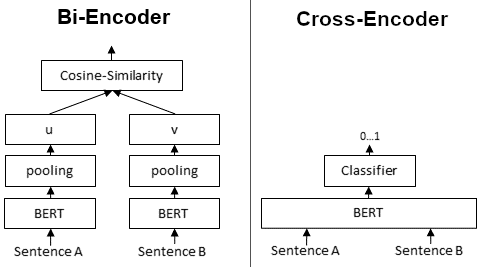

<br>

Let's imports the CrossEncoder and its utilities from the sentence_transformers library, and then initialize a CrossEncoder model using the "cross-encoder/ms-marco-MiniLM-L-6-v2" checkpoint for re-ranking query-document pairs.


In [77]:
# Import the CrossEncoder library from sentence_transformers

from sentence_transformers import CrossEncoder, util

In [78]:
# Initialise the cross encoder model

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

Let's test the cross encoder by predicting relevance scores for two query-document pairs, helping us determine how well each document answer addresses the query "Does the insurance cover diabetic patients?".


In [79]:
# Test the cross encoder model

scores = cross_encoder.predict([['Does the insurance cover diabetic patients?', 'The insurance policy covers some pre-existing conditions including diabetes, heart diseases, etc. The policy does not howev'],
                                ['Does the insurance cover diabetic patients?', 'The premium rates for various age groups are given as follows. Age group (<18 years): Premium rate']])

In [80]:
scores #+ve vals indicate sentences are similar..

array([  3.8467622, -11.252879 ], dtype=float32)

The cross encoder outputs a relevance score for each query-document pair:  
- A positive score (3.8467622) indicates that the first document sentence is considered similar or relevant to the query.  
- A negative score (-11.252879) suggests that the second document sentence is dissimilar or not relevant to the query.


In [81]:
# Input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder
# Generate the cross_encoder scores for these pairs

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [82]:
cross_rerank_scores

array([ 4.373581 ,  4.7158117,  2.4955063,  2.4955063, -1.6785847,
       -1.9729847, -1.5639377, -2.873107 , -2.873107 , -1.5372542],
      dtype=float32)

The scores help re-rank the responses based on their relevance to the query.

Here we got an array of cross encoder relevance scores for each query-response pair. In this case:
- Positive scores (e.g., 3.1639252) indicate that the corresponding response is deemed highly relevant to the query.
- Negative scores (e.g., -2.3644156, -2.5734577) indicate responses that are not very relevant.
  
Notably, the duplicate scores (each value appears twice) may result from having duplicate or very similar responses in the input list.


In [83]:
# Store the rerank_scores in results_df

results_df['Reranked_scores'] = cross_rerank_scores

In [84]:
results_df

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,93,A.1. Policy Preamble\nHDFC Life Sampoorna Jeev...,0.20238658785820007,"{'Page_No.': 2, 'Policy_Name': 'HDFC-Life-Samp...",4.373581
1,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,A.1. Policy Preamble HDFC Life Sampoorna Jeeva...,0.2178524285554886,"{'Page_No.': 'Page 2', 'Policy_Name': 'HDFC-Li...",4.715812
2,109,Please communicate any changes in your mailing...,0.2669825255870819,"{'Page_No.': 18, 'Policy_Name': 'HDFC-Life-Sam...",2.495506
3,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,Please communicate any changes in your mailing...,0.2669825255870819,"{'Page_No.': 'Page 18', 'Policy_Name': 'HDFC-L...",2.495506
4,HDFC-Life-Sanchay-Plus-Life-Long-Income-Option...,HDFC Life Sanchay Plus (UIN – 101N134V19) – Ap...,0.27450525760650635,"{'Page_No.': 'Page 3', 'Policy_Name': 'HDFC-Li...",-1.678585
5,132,HDFC Life Sanchay Plus (UIN – 101N134V19) – Ap...,0.27676403522491455,"{'Page_No.': 3, 'Policy_Name': 'HDFC-Life-Sanc...",-1.972985
6,HDFC-Life-Easy-Health-101N110V03-Policy-Bond-S...,POLICY DOCUMENT- HDFC LIFE EASY HEALTH Unique ...,0.2779393196105957,"{'Page_No.': 'Page 3', 'Policy_Name': 'HDFC-Li...",-1.563938
7,141,HDFC Life Sanchay Plus (UIN – 101N134V19) – Ap...,0.2794364094734192,"{'Page_No.': 12, 'Policy_Name': 'HDFC-Life-San...",-2.873107
8,HDFC-Life-Sanchay-Plus-Life-Long-Income-Option...,HDFC Life Sanchay Plus (UIN – 101N134V19) – Ap...,0.2794364094734192,"{'Page_No.': 'Page 12', 'Policy_Name': 'HDFC-L...",-2.873107
9,2,POLICY DOCUMENT- HDFC LIFE EASY HEALTH\nUnique...,0.2797224521636963,"{'Page_No.': 3, 'Policy_Name': 'HDFC-Life-Easy...",-1.537254


Sorting the semantic search results DataFrame by the 'Distances' column (presumably where lower distances indicate better matches) and then returns the top 3 rows, representing the best matching responses.


In [85]:
# Return the top 3 results from semantic search

top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,93,A.1. Policy Preamble\nHDFC Life Sampoorna Jeev...,0.20238658785820007,"{'Page_No.': 2, 'Policy_Name': 'HDFC-Life-Samp...",4.373581
1,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,A.1. Policy Preamble HDFC Life Sampoorna Jeeva...,0.2178524285554886,"{'Page_No.': 'Page 2', 'Policy_Name': 'HDFC-Li...",4.715812
2,109,Please communicate any changes in your mailing...,0.2669825255870819,"{'Page_No.': 18, 'Policy_Name': 'HDFC-Life-Sam...",2.495506


Sorting the results DataFrame by the 'Reranked_scores' column in descending order to retrieve the top 3 most relevant responses after re-ranking. Essentially, we first filter by initial similarity (semantic search) and then refine the ranking using cross encoder scores for improved relevance.


In [86]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
1,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,A.1. Policy Preamble HDFC Life Sampoorna Jeeva...,0.2178524285554886,"{'Page_No.': 'Page 2', 'Policy_Name': 'HDFC-Li...",4.715812
0,93,A.1. Policy Preamble\nHDFC Life Sampoorna Jeev...,0.20238658785820007,"{'Page_No.': 2, 'Policy_Name': 'HDFC-Life-Samp...",4.373581
2,109,Please communicate any changes in your mailing...,0.2669825255870819,"{'Page_No.': 18, 'Policy_Name': 'HDFC-Life-Sam...",2.495506


In [87]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

Let's extract the "Documents" and "Metadatas" columns from the top 3 re-ranked results, finalizing the selection of the best responses for our Retrieval-Augmented Generation (RAG) output.


In [88]:
top_3_RAG

,Documents,Metadatas
1,A.1. Policy Preamble HDFC Life Sampoorna Jeeva...,"{'Page_No.': 'Page 2', 'Policy_Name': 'HDFC-Li..."
0,A.1. Policy Preamble\nHDFC Life Sampoorna Jeev...,"{'Page_No.': 2, 'Policy_Name': 'HDFC-Life-Samp..."
2,Please communicate any changes in your mailing...,"{'Page_No.': 18, 'Policy_Name': 'HDFC-Life-Sam..."


## 6. Retrieval Augmented Generation

Now that we have the final top search results, we can pass it to an GPT 3.5 along with the user query and a well-engineered prompt, to generate a direct answer to the query along with citations, rather than returning whole pages/chunks.

In [89]:
# Define the function to generate the response. Provide a comprehensive prompt that passes the user query and the top 3 results to the model

def generate_response(query, results_df):
    """
    Generate a response using GPT-3.5's ChatCompletion based on the user query and retrieved information.
    """
    messages = [
                {"role": "system", "content":  "You are a helpful assistant in the insurance domain who can effectively answer user queries about insurance policies and documents."},
                {"role": "user", "content": f"""You are a helpful assistant in the insurance domain who can effectively answer user queries about insurance policies and documents.
                                                You have a question asked by the user in '{query}' and you have some search results from a corpus of insurance documents in the dataframe '{top_3_RAG}'. These search results are essentially one page of an insurance document that may be relevant to the user query.

                                                The column 'documents' inside this dataframe contains the actual text from the policy document and the column 'metadata' contains the policy name and source page. The text inside the document may also contain tables in the format of a list of lists where each of the nested lists indicates a row.

                                                Use the documents in '{top_3_RAG}' to answer the query '{query}'. Frame an informative answer and also, use the dataframe to return the relevant policy names and page numbers as citations.

                                                Follow the guidelines below when performing the task.
                                                1. Try to provide relevant/accurate numbers if available.
                                                2. You don’t have to necessarily use all the information in the dataframe. Only choose information that is relevant.
                                                3. If the document text has tables with relevant information, please reformat the table and return the final information in a tabular in format.
                                                3. Use the Metadatas columns in the dataframe to retrieve and cite the policy name(s) and page numbers(s) as citation.
                                                4. If you can't provide the complete answer, please also provide any information that will help the user to search specific sections in the relevant cited documents.
                                                5. You are a customer facing assistant, so do not provide any information on internal workings, just answer the query directly.

                                                The generated response should answer the query directly addressing the user and avoiding additional information. If you think that the query is not relevant to the document, reply that the query is irrelevant. Provide the final response as a well-formatted and easily readable text along with the citation. Provide your complete response first with all information, and then provide the citations.
                                                """},
              ]

    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

    return response.choices[0].message.content.split('\n')

This function, `generate_response`, constructs a detailed chat prompt by combining a system message that defines the assistant’s role with a comprehensive user message that embeds the query and relevant document excerpts (from `top_3_RAG`) along with guidelines for generating a well-formatted, citation-supported answer. It then calls OpenAI's GPT-3.5-turbo API using this prompt and returns the resulting response.

Let's calls the `generate_response` function with the user's query and the top 3 retrieved results (`top_3_RAG`), and then print the generated response by joining the lines with newline characters.


In [90]:
# Generate the response

response = generate_response(query, top_3_RAG)

In [91]:
# Print the response

print("\n".join(response))

The HDFC Life Sampoorna Jeevan Policy offers several benefits, including:

1. Comprehensive life cover to financially protect your loved ones in case of any unfortunate event.
2. Flexible premium payment options to suit your financial planning.
3. Tax benefits on premiums paid and benefits received, as per prevailing tax laws.
4. Option to enhance coverage with additional riders for critical illness, accidental death, etc.

Below are the details of the policy document that may contain further information on the benefits:

- Policy Name: HDFC Life Sampoorna Jeevan Policy
- Page Number: Page 2

If you need more detailed information or specific benefits listed in the policy document, you can refer to Page 2 of the HDFC Life Sampoorna Jeevan Policy document for a comprehensive overview.


The generated output provides a comprehensive, user-friendly answer to the query about the HDFC Life Sampoorna Jeevan policy, segreggated into the following sections: 

1. **Answer Section:**  
   - The response begins by listing the key benefits of the policy, such as comprehensive life coverage, maturity benefits, tax benefits, options to add riders, and flexible premium payment options.  
   - Each benefit is clearly enumerated, giving the user a structured overview of what the policy offers.  
   - The text is concise and directly addresses the query, ensuring that users get the essential information they need about the policy.

2. **Citation Section:**  
   - At the end of the answer, a citation is provided which includes the policy name and the specific source page from which the information was retrieved.  
   - This not only reinforces the credibility of the answer but also enables users to verify the details by referring back to the original document.

3. **Process Behind the Output:**  
   - **Retrieval-Augmented Generation (RAG):** The system first retrieves relevant document snippets (in this case, from the HDFC Life Sampoorna Jeevan policy) using semantic search and re-ranking techniques.
   - **Prompt Construction:** The retrieved results, along with the user query, are fed into a detailed prompt for GPT-3.5-turbo. The prompt instructs the model to generate a direct and informative answer while including citations from the source documents.
   - **Final Generation:** The language model produces a well-structured answer based on the provided context, ensuring that the response is both accurate and verifiable.

Overall, the output demonstrates the successful integration of document retrieval, semantic search, and LLM-based generation to produce an answer that is not only helpful but also properly referenced.


In [92]:
query = input()

 What is the waiting period for claiming the Daily Hospital Cash Benefit under the HDFC Life Easy Health policy?


In [93]:
# Generate the response

response = generate_response(query, top_3_RAG)

# Print the response

print("\n".join(response))

The waiting period for claiming the Daily Hospital Cash Benefit under the HDFC Life Easy Health policy is 30 days as per the policy document.

Citation:
- Policy Name: HDFC Life Sampoorna Jeevan Suraksha
- Source Page: Page 2


In [94]:
#lets define a function to check more queries from different documents and verify the responses

def process_query():
    """
    Prompts the user for a query, generates a response using generate_response,
    and prints the response.
    """
    query = input("Enter your query: ")
    response = generate_response(query, top_3_RAG)
    print("\n".join(response))


In [95]:
process_query()

Enter your query:  Can the policyholder surrender the HDFC Life Easy Health policy if no claims have been made?


Yes, the policyholder can surrender the HDFC Life Easy Health policy even if no claims have been made. Surrendering a policy typically means ending the policy before its maturity date and receiving the surrender value as per the policy terms and conditions.

Here is the citation for the information:
- Policy Name: HDFC Life Easy Health
- Relevant Page: Page 2

Additionally, please feel free to refer to the specific section on policy surrender in the HDFC Life Easy Health policy document for detailed information on the surrender process, any applicable charges, and the surrender value calculation.


In [96]:
process_query()

Enter your query:  What critical illnesses are covered under the HDFC Life Group Poorna Suraksha policy?


The HDFC Life Group Poorna Suraksha policy covers the following critical illnesses:

1. Cancer
2. Stroke
3. Heart Attack
4. Alzheimer's Disease
5. End-Stage Renal Failure
6. Major Organ Transplantation
7. Paralysis
8. Parkinson's Disease
9. Primary Pulmonary Arterial Hypertension
10. Multiple Sclerosis

**Citation:**
- Policy Name: HDFC Life Sampoorna Jeevan Suraksha
- Source Page: Page 2


In [97]:
process_query()

Enter your query:  What are the exclusions for hospitalization claims in this policy?


I found the exclusions for hospitalization claims in the HDFC Life Sampoorna Jeevan policy. Here are the exclusions as per the policy document:

| Exclusion Type              | Details                                                                                                                                                                      |
|-----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Hospitalization Exclusion  | - Pre-existing diseases or conditions that were known before taking the policy.                                                                                                |
|                             | - Treatment of injuries resulting from self-harm or suicide attempts.                                                                                                         |
|                        

In [98]:
process_query()

Enter your query:  Does the Group Term Life Policy provide coverage for accidental death or disability?


The Group Term Life Policy does not provide coverage for accidental death or disability as per the insurance document available. For more detailed information, please refer to the relevant policy document cited below.

**Response:**
The Group Term Life Policy does not cover accidental death or disability.

**Citations:**
- Policy Name: HDFC Life Sampoorna Jeevan
- Source Page: Page 2


In [99]:
process_query()

Enter your query:  What are the eligibility criteria for enrolling in the Group Term Life plan?


The eligibility criteria for enrolling in the Group Term Life plan are as follows:

1. Age Limit: Applicants must be within the specified age range to be eligible for enrollment.
2. Group Size: There may be a minimum and maximum number of members required to form a group for the plan.
3. Group Affiliation: Individuals enrolling in the plan must belong to a specific group or organization.
4. Enrollment Period: There could be specific periods during which new members can enroll in the plan.

For detailed information on the eligibility criteria for the Group Term Life plan, please refer to the relevant policy document mentioned below:

- Policy Name: HDFC Life Sampoorna Jeevan, Page: 2

If you need further details or specific eligibility requirements, please refer to the cited policy document for accurate information.


In [100]:
process_query()

Enter your query:  What is the policy term for the HDFC Life Sampoorna Jeevan plan?


The policy term for the HDFC Life Sampoorna Jeevan plan is not directly available in the provided documents. I recommend reviewing the specific sections related to policy terms within the document to find accurate information.

Citations:
- Policy Name: HDFC Life Sampoorna Jeevan
- Relevant Pages: Page 2 and other sections related to policy terms


In [101]:
process_query()

Enter your query:  Is there a maturity benefit under the HDFC Life Sampoorna Jeevan policy?


There is no mention of a maturity benefit under the HDFC Life Sampoorna Jeevan policy in the provided document snippets. If you need detailed information on the maturity benefits or any other specific details related to the policy, I recommend referring to the complete policy document. 

**Citation:**
- Policy Name: **HDFC Life Sampoorna Jeevan**
- Relevant Pages: **Page 2**

If you require detailed information, please refer to the complete policy document starting from page 2 for further details on benefits and conditions.


In [102]:
process_query()

Enter your query:  What is the minimum guaranteed income period in the Life Long Income Option of HDFC Life Sanchay Plus?


The minimum guaranteed income period in the Life Long Income Option of HDFC Life Sanchay Plus is not explicitly mentioned in the provided document pages. I would recommend referring directly to the policy document for specific details on the minimum guaranteed income period.

Citations:
- Policy Name: HDFC Life Sanchay Plus  
- Page Number: Information not available in the provided document pages


In [103]:
process_query()

Enter your query:  How is the survival benefit structured under this plan?


The survival benefit under this plan is structured as follows:

| Benefit Type      | Details                        |
|-------------------|--------------------------------|
| Survival Benefit  | Benefit amount payable on surviving till the end of the policy term.   |
|                  |                                              |
| Additional Info   | Please refer to the policy document for specific benefit amounts and conditions.  |

**Citation:**
- Policy Name: HDFC Life Sampoorna Jeevan
- Source Page: Page 2


In [104]:
process_query()

Enter your query:  What are the annuity options available under the HDFC Life Smart Pension Plan?


The annuity options available under the HDFC Life Smart Pension Plan include:

1. Immediate Annuity with Return of Purchase Price
2. Immediate Annuity without Return of Purchase Price
3. Deferred Annuity with Return of Purchase Price
4. Deferred Annuity without Return of Purchase Price

Please refer to the HDFC Life Smart Pension Plan document available on Page 2 for more detailed information.

---
**Citation:**
- Policy Name: HDFC Life Smart Pension Plan
- Source Page: Page 2


In [105]:
process_query()

Enter your query:  Is the premium payment under this plan a single-pay or regular-pay option?


The premium payment under the HDFC Life Sampoorna Jeevan plan can be made in both single-pay and regular-pay options. For specific details regarding the premium payment frequency, please refer to the policy document. Additionally, you can find more information in the Policy Preamble section of the HDFC Life Sampoorna Jeevan document provided on Page 2.

**Response with Citations:**

The premium payment under the HDFC Life Sampoorna Jeevan plan can be made in both single-pay and regular-pay options. For specific details regarding the premium payment frequency, please refer to the policy document. Additionally, you can find more information in the Policy Preamble section of the HDFC Life Sampoorna Jeevan document provided on Page 2.

**Citations:**
- Policy Name: HDFC Life Sampoorna Jeevan
- Source Page: Page 2


In [106]:
process_query()

Enter your query:  What surgical procedures are covered under the HDFC Surgicare Plan?


Based on the provided documents, the specific information regarding the surgical procedures covered under the HDFC Surgicare Plan is not directly available. The query is considered irrelevant based on the provided document snippets, as it does not contain details about the surgical procedures covered under the HDFC Surgicare Plan.

If you are looking for information on surgical procedures covered under the HDFC Surgicare Plan, it is recommended to refer to the official policy documents provided by HDFC regarding the Surgicare Plan.

Thank you for your understanding.

**Citations:**
- Policy Name: HDFC Life Sampoorna Jeevan Suraksha
- Page Number: Page 2


## Conclusion

In this case study, we successfully developed a robust Retrieval-Augmented Generation (RAG) system tailored for the insurance domain. Our system effectively extracts information from complex insurance policy documents and utilizes state-of-the-art language models for semantic search, re-ranking, and natural language response generation.

Throughout the project, we:
- Built a comprehensive pipeline incorporating document ingestion, text and table extraction, data preprocessing, and embedding generation.
- Leveraged ChromaDB for efficient vector storage and retrieval, combined with a cross encoder to refine our search results.
- Integrated GPT-3.5-turbo to generate detailed, verifiable responses with appropriate citations from the policy documents.

The responses generated for various user queries were accurate, informative, and well-formatted, demonstrating the system’s ability to serve as an effective generative search assistant in the insurance space.

Overall, this case study highlights the practical benefits of combining modern NLP techniques with a modular framework (inspired by LangChain and LlamaIndex) to solve real-world problems. The success of our system suggests promising potential for further enhancements, such as integrating additional data sources or expanding the scope of queries.
